In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 파일 읽기

- [서울시 코로나19 확진자 현황](http://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do)
## 컬럼
- ID : 확진자 ID. 발생순서대로 1씩증가하는 값
- 확진일: 확진 날짜
- 자치구: 확진 결과를 받은 지역구.
- 여행력: 해외유입의 경우 국가명
- 접촉력: 감염된 경로. 
- 현재상태: 퇴원, 사망, NA: 치료중

In [3]:
corona = pd.read_csv('data/corona19_seoul_2021-03-15.csv')
corona

,ID,확진일,자치구,여행력,접촉력,현재상태
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN
...,...,...,...,...,...,...
30056,5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원
30057,4,2020-01-30,종로구,중국,해외유입,퇴원
30058,3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원
30059,2,2020-01-30,강서구,중국,해외유입,퇴원


# DataFrame 기본정보 조회

In [4]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      30061 non-null  int64 
 1   확진일     30061 non-null  object
 2   자치구     30061 non-null  object
 3   여행력     976 non-null    object
 4   접촉력     30061 non-null  object
 5   현재상태    27143 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [6]:
corona.describe(include = 'object')

,확진일,자치구,여행력,접촉력,현재상태
count,30061,30061,976,30061,27143
unique,384,27,120,512,2
top,2020-12-17,기타,미국,기타 확진자 접촉,퇴원
freq,588,2000,329,9660,26738


In [7]:
corona.columns

Index(['ID', '확진일', '자치구', '여행력', '접촉력', '현재상태'], dtype='object')

In [8]:
corona.values

array([[30061, '2021-03-14', '동대문구', nan, "동대문구 소재 병원 관련(\\'21.2.)",
        '사망'],
       [30060, '2021-03-14', '강동구', nan, '감염경로 조사중', nan],
       [30059, '2021-03-14', '타시도', nan, '관악구 소재 미용업 관련', nan],
       ...,
       [3, '2020-01-30', '중랑구', nan, '종로구 집단발병', '퇴원'],
       [2, '2020-01-30', '강서구', '중국', '해외유입', '퇴원'],
       [1, '2020-01-24', '강서구', '중국', '해외유입', '퇴원']], dtype=object)

##  범주형 컬럼들의 고유값들 조회

In [13]:
corona['자치구'].value_counts()

기타      2000
강서구     1704
송파구     1658
타시도     1413
관악구     1408
강남구     1376
노원구     1322
성북구     1298
은평구     1262
중랑구     1250
동작구     1238
서초구     1148
양천구     1144
영등포구    1122
구로구     1094
동대문구    1087
강동구     1036
마포구      990
도봉구      954
광진구      876
용산구      815
서대문구     786
강북구      785
성동구      763
종로구      579
금천구      478
중구       475
Name: 자치구, dtype: int64

In [14]:
corona['현재상태'].value_counts()

퇴원    26738
사망      405
Name: 현재상태, dtype: int64

# 확진일 확진자수 정보 조회

## 확진일의 빈도수

In [17]:
corona['확진일'].value_counts()

2020-12-17    588
2020-12-24    566
2020-12-28    524
2020-12-25    430
2020-12-16    427
             ... 
2020-04-15      1
2020-04-24      1
2020-05-01      1
2020-01-24      1
2020-03-05      1
Name: 확진일, Length: 384, dtype: int64

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series)`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html

## 확진일을 datetime으로 변환

In [22]:
corona['확진일'] = pd.to_datetime(corona['확진일'])
corona

,ID,확진일,자치구,여행력,접촉력,현재상태
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN
...,...,...,...,...,...,...
30056,5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원
30057,4,2020-01-30,종로구,중국,해외유입,퇴원
30058,3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원
30059,2,2020-01-30,강서구,중국,해외유입,퇴원


## 확진일 관련 파생변수 추가
- 확진일에서 년을 추출해서 **'년'** 컬럼을 생성
- 확진일에서 월을 추출해서 **'월'** 컬럼을 생성
- 확진일에서 주(1년 중 몇번째 주)를 추출해서 **'주'** 컬럼을 생성
- 확진일에서 요일을 추출해서 **'요일'** 컬럼을 생성. 

In [40]:
corona['년'] = corona['확진일'].dt.year
corona['월'] = corona['확진일'].dt.month
corona['주'] = corona['확진일'].dt.week
corona['요일'] = corona['확진일'].dt.dayofweek

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
corona

,ID,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망,2021,3,10,6
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN,2021,3,10,6
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN,2021,3,10,6
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN,2021,3,10,6
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN,2021,3,10,6
...,...,...,...,...,...,...,...,...,...,...
30056,5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원,2020,1,5,4
30057,4,2020-01-30,종로구,중국,해외유입,퇴원,2020,1,5,3
30058,3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원,2020,1,5,3
30059,2,2020-01-30,강서구,중국,해외유입,퇴원,2020,1,5,3


## 요일 정수를 문자열(월,화,수,목,금,토,일)로 변경
- datetime에서 요일을 추출하면 정수로 반환된다.
    - dt.week 로 조회시 - 월요일: 0, 일요일: 6
    - dt.isocalendar()['week']로 조회시 - 월요일 : 1, 일요일: 7

In [42]:
def change_dayofweek(x):
    if x == 0:
        return '월'
    elif x == 1:
        return '화'
    elif x == 2:
        return '수'
    elif x == 3:
        return '목'
    elif x == 4:
        return '금'
    elif x == 5:
        return '토'
    else:
        return '일'

In [46]:
corona['요일'] = corona['요일'].apply(change_dayofweek)

In [47]:
corona

,ID,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망,2021,3,10,일
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN,2021,3,10,일
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN,2021,3,10,일
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN,2021,3,10,일
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN,2021,3,10,일
...,...,...,...,...,...,...,...,...,...,...
30056,5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원,2020,1,5,금
30057,4,2020-01-30,종로구,중국,해외유입,퇴원,2020,1,5,목
30058,3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원,2020,1,5,목
30059,2,2020-01-30,강서구,중국,해외유입,퇴원,2020,1,5,목


###  Categorical Data 타입
> - 범주형 타입
> - 문자열과 차이점
>     - 내부적으로 정수로 관리되기 때문에 메모리를 절약 할 수 있다. 
>     - 사전적 순서와 논리적 순서가 다를 경우 논리적 순서로 정렬되도록 정의 할 수 있다.
>         - 사전적순서: Four One Three Two
>         - 논리적순서: One Two Three Four
> - str 타입 Series를 Categorical 타입으로 변환
>     - `pandas.Categorical(변환할Series, [categories=[고유값 리스트], ordered=None])`
    - categories: 고유값 리스트를 지정한다. 생략할 경우 Series의 고유값들을 가지고 만든다.
        - 원하는 순서대로 지정하기 위해서는 설정한다.
    - ordered: 순성형 여부 설정

## 요일을 Categorical Type으로 변환

In [61]:
corona['요일'] = pd.Categorical(corona['요일'], categories = ['월', '화', '수', '목', '금', '토', '일'])

In [62]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      30061 non-null  int64         
 1   확진일     30061 non-null  datetime64[ns]
 2   자치구     30061 non-null  object        
 3   여행력     976 non-null    object        
 4   접촉력     30061 non-null  object        
 5   현재상태    27143 non-null  object        
 6   년       30061 non-null  int64         
 7   월       30061 non-null  int64         
 8   주       30061 non-null  int64         
 9   요일      30061 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(4), object(4)
memory usage: 2.1+ MB


## 확진자 수 변화 추이 시각화

In [63]:
corona

,ID,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망,2021,3,10,일
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN,2021,3,10,일
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN,2021,3,10,일
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN,2021,3,10,일
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN,2021,3,10,일
...,...,...,...,...,...,...,...,...,...,...
30056,5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원,2020,1,5,금
30057,4,2020-01-30,종로구,중국,해외유입,퇴원,2020,1,5,목
30058,3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원,2020,1,5,목
30059,2,2020-01-30,강서구,중국,해외유입,퇴원,2020,1,5,목


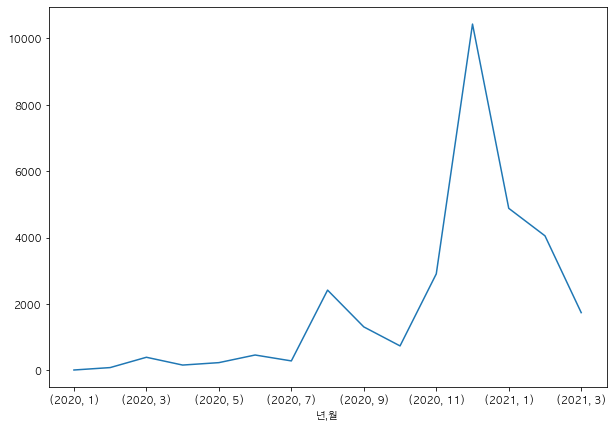

In [70]:
확진자수 = corona.groupby(['년', '월'])['ID'].count()

확진자수.plot.line(figsize = (10, 7))
plt.show()

## 2020년 12월 이후 확진일 기준으로 확진자 수 변화 추이 시각화

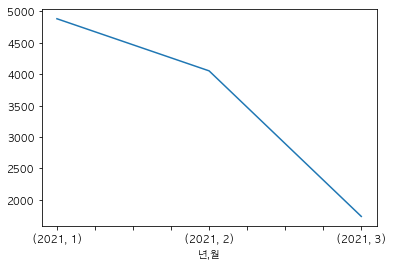

In [75]:
corona[corona['년'] > 2020].groupby(['년', '월'])['ID'].count().plot.line()
plt.show()

## 년도-주 단위 확진자 수 변화 추이 시각화
- ex) 2020년 1주차, 2020년 2주차 ... 

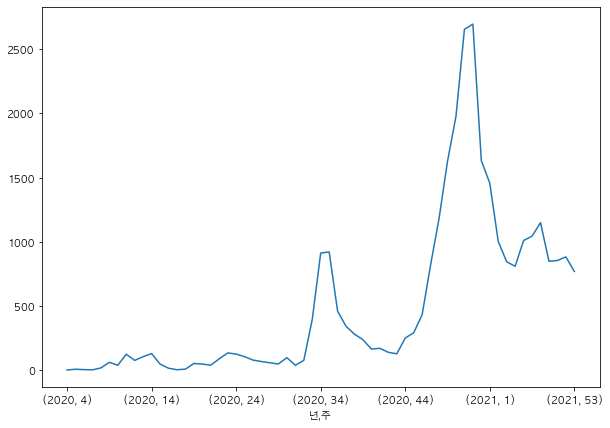

In [78]:
corona.groupby(['년', '주'])['ID'].count().plot.line(figsize = (10, 7))
plt.show()

## 년-월 단위  확진자수 조회 및 시각화

In [79]:
corona.groupby(['년', '월'])['ID'].count()

년     월 
2020  1         7
      2        80
      3       391
      4       156
      5       229
      6       459
      7       281
      8      2415
      9      1306
      10      733
      11     2904
      12    10433
2021  1      4880
      2      4051
      3      1736
Name: ID, dtype: int64

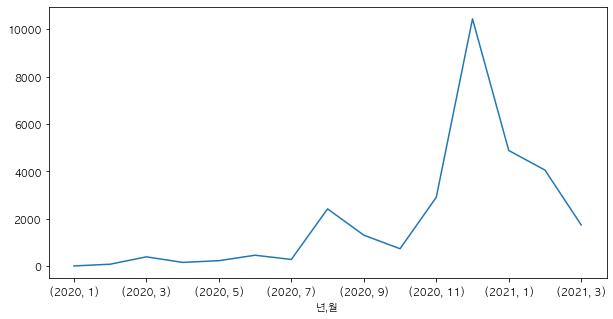

In [82]:
corona.groupby(['년', '월'])['ID'].count().plot.line(figsize = (10, 5))
plt.show()

## 월-요일별 확진자수 조회 및 시각화

In [85]:
corona.groupby(['월', '요일'])['ID'].count()

월   요일
1   월      564
    화      684
    수      663
    목      539
    금      874
          ... 
12  수     1647
    목     2072
    금     1410
    토     1273
    일     1092
Name: ID, Length: 84, dtype: int64

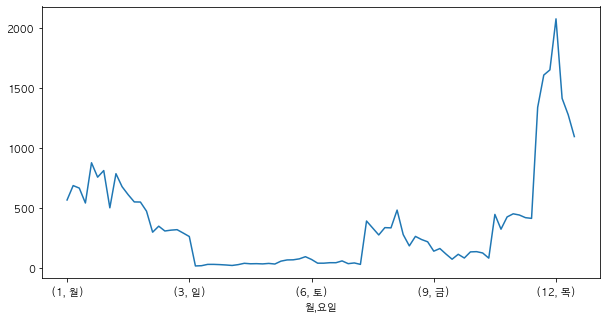

In [84]:
corona.groupby(['월', '요일'])['ID'].count().plot.line(figsize = (10, 5))
plt.show()

# 누적 확진자수 조회 및 변화 흐름 시각화
- Series/DataFrame.cumsum()
    - 누적 합계
- Series.to_frame()
    - Series를 DataFrame으로 변환

## 일별 누적 확진자수 조회

In [94]:
corona.groupby(['확진일'])['ID'].count()

확진일
2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-03-10    137
2021-03-11    140
2021-03-12    140
2021-03-13    112
2021-03-14    112
Name: ID, Length: 384, dtype: int64

In [93]:
corona.groupby(['확진일'])['ID'].count().cumsum()

확진일
2020-01-24        1
2020-01-30        4
2020-01-31        7
2020-02-02        8
2020-02-05       10
              ...  
2021-03-10    29557
2021-03-11    29697
2021-03-12    29837
2021-03-13    29949
2021-03-14    30061
Name: ID, Length: 384, dtype: int64

## 누적확진자수 파생변수 생성

In [104]:
누적확진자수 = corona.groupby(['확진일'])['ID'].count().cumsum().to_frame()
누적확진자수

,ID
확진일,
2020-01-24,1
2020-01-30,4
2020-01-31,7
2020-02-02,8
2020-02-05,10
...,...
2021-03-10,29557
2021-03-11,29697
2021-03-12,29837


## 누적 확진자수 선그래프

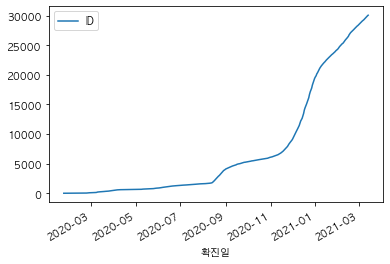

In [113]:
누적확진자수.plot.line()
plt.legend()
plt.show()

# 자치구 기준 확진자 조회

## 자치구별 확진자수 조회

In [115]:
corona.groupby('자치구')['ID'].count()

자치구
강남구     1376
강동구     1036
강북구      785
강서구     1704
관악구     1408
광진구      876
구로구     1094
금천구      478
기타      2000
노원구     1322
도봉구      954
동대문구    1087
동작구     1238
마포구      990
서대문구     786
서초구     1148
성동구      763
성북구     1298
송파구     1658
양천구     1144
영등포구    1122
용산구      815
은평구     1262
종로구      579
중구       475
중랑구     1250
타시도     1413
Name: ID, dtype: int64

## 자치구별 확진자수 시각화

In [122]:
corona['자치구'].values

array(['동대문구', '강동구', '타시도', ..., '중랑구', '강서구', '강서구'], dtype=object)

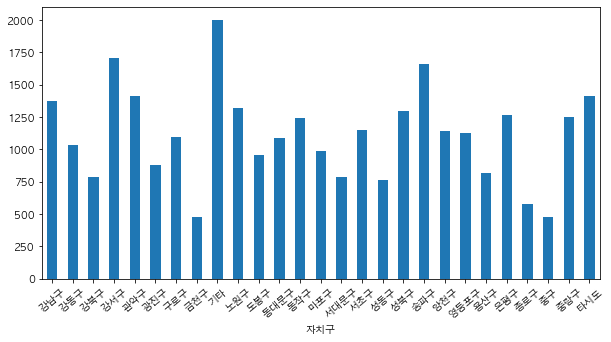

In [126]:
corona.groupby('자치구')['ID'].count().plot.bar(rot = 40, figsize = (10, 5))
plt.show()

# 접촉력 관련 확진자 조회

## 가장 많은 집단 감염자를 낸 접촉력 상위 15개 조회

In [131]:
corona.groupby('접촉력')['ID'].count().sort_values(ascending = False)[:15]

접촉력
기타 확진자 접촉             9660
감염경로 조사중              6994
타시도 확진자 접촉            1304
동부구치소 관련              1175
해외유입                   965
성북구 사랑제일교회 관련          641
강서구 교회 관련              246
종로구 소재 파고다타운 관련        227
구로구 소재 요양병원/요양원 관련     226
강서구 댄스교습관련 시설          224
용산구 소재 병원 관련           219
병원 및 요양시설              170
이태원 클럽 관련              139
8.15서울도심집회             126
마포구 홍대새교회 관련           109
Name: ID, dtype: int64

## 가장 많은 집단 감염자를 낸 접촉력 하위 15 

In [132]:
corona.groupby('접촉력')['ID'].count().sort_values(ascending = True)[:15]

접촉력
역조실 일보 반영           1
중랑구 서울의료원           1
서초구소재 종교시설 관련       1
구로구소재 고등학교 관련       1
중구 소재 콜센터(다은컨설팅)    1
광진구 소재 병원 관련        1
관악구 투석환자 관련         1
신 천 지               1
아산병원                1
안양 목회자 관련           1
관악구 김혜근의원           1
영등포 소재 의료기관 관련      1
강남구 오렌지라이프 관련       1
종로구 서울대병원           1
용산구 음식점 관련          1
Name: ID, dtype: int64

## 접촉력 상위 15개만 시각화

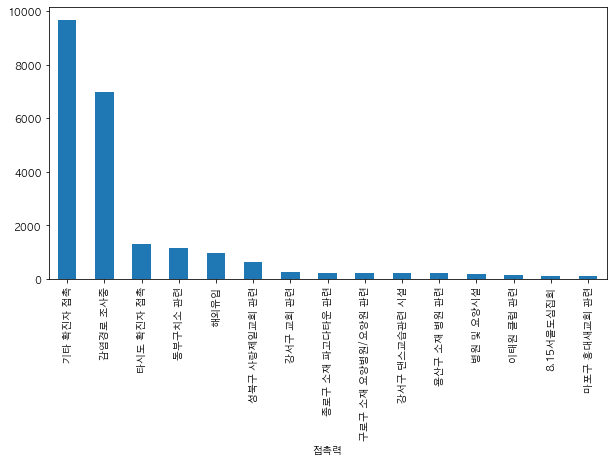

In [137]:
high_touched = corona.groupby('접촉력')['ID'].count().sort_values(ascending = False)[:15]
high_touched.plot.bar(figsize = (10, 5))
plt.show()

## 확진자를 가장 많이 발생시킨 접촉력 상위 15개를 기준으로  월별 빈도수를 집계
- 몇 월에 발생했는지 확인 (년도는 무시)

In [238]:
corona.groupby('접촉력')['ID'].count().sort_values(ascending = False)[:15]

접촉력
기타 확진자 접촉             9660
감염경로 조사중              6994
타시도 확진자 접촉            1304
동부구치소 관련              1175
해외유입                   965
성북구 사랑제일교회 관련          641
강서구 교회 관련              246
종로구 소재 파고다타운 관련        227
구로구 소재 요양병원/요양원 관련     226
강서구 댄스교습관련 시설          224
용산구 소재 병원 관련           219
병원 및 요양시설              170
이태원 클럽 관련              139
8.15서울도심집회             126
마포구 홍대새교회 관련           109
Name: ID, dtype: int64

In [242]:
빈도수 = corona.pivot_table(values = 'ID', index = '접촉력', columns = '월', aggfunc = 'count')
빈도수

월,1,2,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,,,
(인천계양구일가족관련) 연세나로학원,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8.15서울도심집회,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.0,13.0,NaN,NaN,NaN
9월 송파구 지인모임,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
Ace 손해보험,NaN,NaN,97.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EZHLD,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
플링크(IT기업),NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
한양대병원,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
해외유입,152.0,141.0,164.0,111.0,25.0,23.0,39.0,50.0,23.0,44.0,83.0,110.0


# 현재상태 관련조회

## 사망자 수/비율 조회

In [167]:
사망자수 = corona[corona['현재상태'] == '사망']['ID'].count()
사망자수

405

In [168]:
전체수 = corona['ID'].count()
전체수

30061

In [172]:
print(f'사망자 수 비율: {사망자수/전체수 * 100}%')

사망자 수 비율: 1.3472605701739795%


## 퇴원, 사망자, 치료중(NA)의 비율을 시각화

In [173]:
퇴원수 = corona[corona['현재상태'] == '퇴원']['ID'].count()
퇴원수

26738

In [252]:
치료중수 = corona[corona['현재상태'].isna()]['ID'].count()
치료중수

2918

In [253]:
현재상태 = pd.Series([퇴원수, 사망자수, 치료중수])
현재상태.index = ['퇴원수', '사망자수', '치료중수']
현재상태

퇴원수     26738
사망자수      405
치료중수     2918
dtype: int64

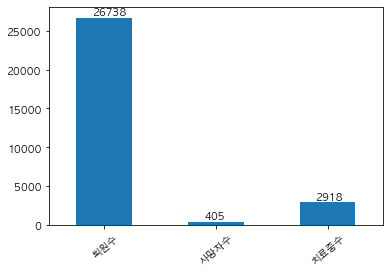

In [254]:
현재상태.plot.bar(rot = 40)
for idx, val in enumerate(현재상태):
    plt.text(idx - 0.1, val + 300, val)
plt.show()

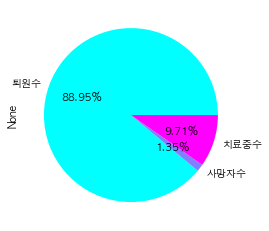

In [262]:
현재상태.plot.pie(autopct = '%.2f%%', cmap = 'cool')
plt.show()